In [1]:
# Import libraries
import ipywidgets as widgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, plot_roc_curve
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import pickle

In [2]:

# Import the data 
stroke_data_frame = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Set the randomization seed 
np.random.seed(21)

# Fill the "bmi" column with the average bmi
stroke_data_frame["bmi"].fillna(stroke_data_frame["bmi"].mean(), inplace=True)

# Shuffle the data set
shuffled_stroke_data_frame = stroke_data_frame.sample(frac=1)

# Split into X and y
non_numeral_X = shuffled_stroke_data_frame.drop(["stroke","id"], axis=1)
y = shuffled_stroke_data_frame["stroke"]

# Converts the categories into a numerical format
numeral_values_X = pd.get_dummies(shuffled_stroke_data_frame[["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]])
X = numeral_values_X.join(non_numeral_X.drop(["gender", "ever_married", "work_type", "Residence_type", "smoking_status"], axis=1))

# Split the data into train, validation & test sets
train_split = round(0.7 * len(shuffled_stroke_data_frame)) # 70% of data
valid_split = round(train_split + 0.15 * len(shuffled_stroke_data_frame)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# Create the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Baseline predictions
y_preds = model.predict(X_valid)

# # Evaluate the model's accuracy
# accuracy = round(accuracy_score(y_valid, y_preds), 2)
# print(f" Base Accuracy: {accuracy * 100}%")

# # This is a dictionary with a list of parameters for improving the model
# params = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
#         "max_depth": [None, 5, 10, 20, 30],
#         "max_features": ["auto", "sqrt"],
#         "min_samples_split": [2, 4, 6],
#         "min_samples_leaf": [1, 2, 4]}

# # Iterate through the different possible parameters to determine the 
# # best model parameters.
# opt_model = RandomizedSearchCV(estimator=model,
#                             param_distributions=params, 
#                             n_iter=10, 
#                             cv=5,
#                             verbose=2)
# # train the new model
# opt_model.fit(X_train, y_train);


 Base Accuracy: 95.0%
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=500, min_samples_split=2, min_samp

[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.0s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.0s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.0s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.0s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.4s finished


In [3]:
# # Test the optimized model
# y_preds = model.predict(X_test)
# accuracy = round(accuracy_score(y_test, y_preds), 2)
# print(f" Optimized Accuracy: {accuracy * 100}%")

 Optimized Accuracy: 95.0%


<h1><center>Stroke Risk Model Data Analysis</center></h1>

<h2><center>Correlation matrix</center></h2>
<h3><center>
The correlation matrix below can be used to inspect the dataframe's attributes. 
For example, we can clearly see that there is a positive correlation between age and being married.
</center></h3>

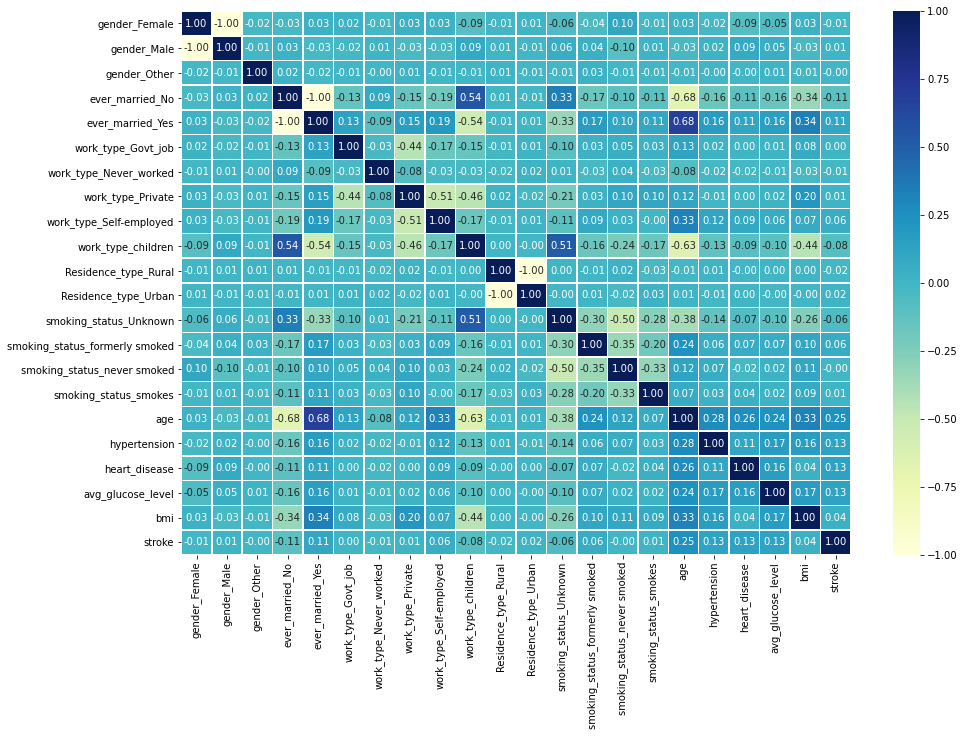

In [4]:
# Combine the X and y
num_stroke_data = X
num_stroke_data['stroke'] = y

# Creating a correlation matrix
correlation_matrix = num_stroke_data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(correlation_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

<h2><center>ROC Curve</center></h2>
<h3><center>
Observed below is a ROC curve. This graph measures the abilities of the model to classify correctly as its descrimination threshold varies. By analyzing the Area Under the Curve (AUC) we can determine the accuracy of the model. An AUC value of 0.5 is considerred the worst possible score, and an AUC value of 1 is considerred best. This particular model is valued at 0.82. This means the model is making accurate predictions most of the time.
</center></h3>

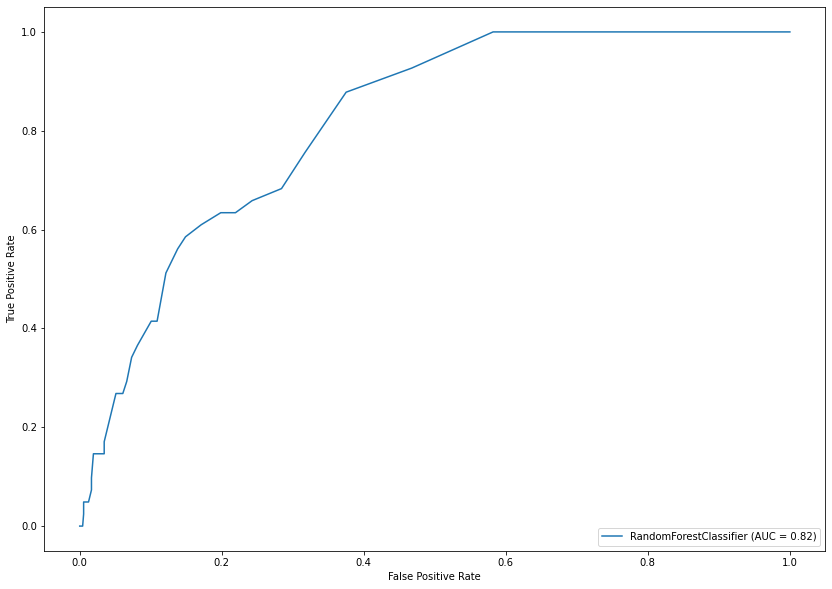

In [5]:
# Plot the ROC curve and Measure the AUC
fig, ax = plt.subplots(figsize=(14, 10))
plot_roc_curve(model, X_test, y_test, ax=ax);

<h2><center>Average Glucose Level and Age Relationship</center></h2>
<h3><center>
Below is a scatter plot reviewing the relationship between glucose levels and age. It clearly
shows that individuals over the age over 50 are more prone to having a stroke. It also shows 
that individuals with high glucose levels above the age of 50 are more susceptible to having a
stroke than individuals with lower glucose levels at the same age.
</center></h3>

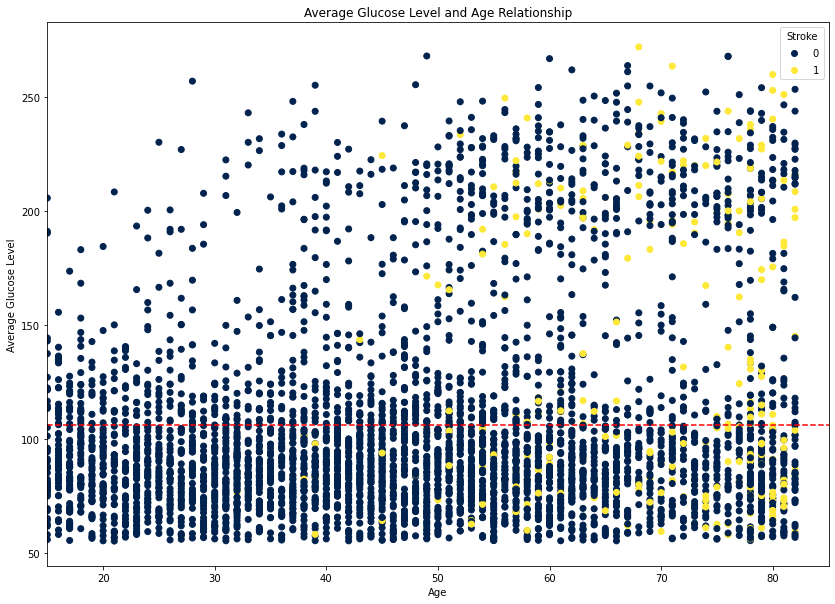

In [6]:
# Create the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Plot the data
scatter = ax.scatter(shuffled_stroke_data_frame["age"], 
                     shuffled_stroke_data_frame["avg_glucose_level"], 
                     c=shuffled_stroke_data_frame["stroke"],
                     cmap="cividis") # changed cmap parameter

# Customize the plot
ax.set(title="Average Glucose Level and Age Relationship",
       xlabel="Age",
       ylabel="Average Glucose Level")
ax.set_xlim((15,85))
ax.legend(*scatter.legend_elements(), title="Stroke")

# Add a meanline
ax.axhline(shuffled_stroke_data_frame["avg_glucose_level"].mean(),
           linestyle="--",
           color="red"); # changed color parameter

<h1><center>Stroke Analysis Tool</center></h1>

<h2 align="center">
    The tool below will analyze a patients probability of having a stroke in the near future. Simply follow the form and enter the information neccessary. All fields must be filled.
</h2> 

In [7]:
# These widgets handle user input and store the data
sex = widgets.RadioButtons(
    options=[('Male',[0,1,0]), ('Female',[1,0,0])],
    value=[1,0,0],
    description='Sex:',
    disabled=False
)
ever_married = widgets.RadioButtons(
    options=[('Yes',[0,1]), ('No',[1,0])],
    value=[0,1],
    description='Ever married?:',
    style=dict(description_width='initial'),
    disabled=False
)
work_type = widgets.RadioButtons(
    options=[('Children',[0,0,0,0,1]), ('Self-employed',[0,0,0,1,0]),
             ('Govt-job',[1,0,0,0,0]), ('Private',[0,0,1,0,0]),
             ('Never worked',[0,1,0,0,0])],
    value=[0,0,1,0,0],
    description='Work type:',
    disabled=False
)
residence = widgets.RadioButtons(
    options=[('Rural',[1,0]), ('Urban',[0,1])],
    value=[0,1],
    description='Residence:',
    disabled=False
)
smoking_status = widgets.RadioButtons(
    options=[('formerly smoked',[0,1,0,0]), ('never smoked',[0,0,1,0]),('smokes',[0,0,0,1])],
    value=[0,0,1,0],
    description='Heart Disease:',
    style=dict(description_width='initial'),
    disabled=False
)
age = widgets.BoundedIntText(
    value=18,
    min=18,
    max=130,
    step=1,
    description='Age:',
    disabled=False
)
hypertension = widgets.RadioButtons(
    options=[('Yes, I have Hypertension',1), ('No, I do not have Hypertension',0)],
    value=0,
    description='Hypertenstion:',
    style=dict(description_width='initial'),
    disabled=False
)
heart_disease = widgets.RadioButtons(
    options=[('Yes, I have Heart Disease',1), ("No, I don't have Heart Disease",0)],
    value=0,
    description='Heart Disease:',
    style=dict(description_width='initial'),
    disabled=False
)
average_glucose_level = widgets.BoundedFloatText(
    value=50,
    min=50,
    max=300,
    step=0.1,
    description='Glucose Level:',
    style=dict(description_width='initial'),
    disabled=False
)
bmi = widgets.BoundedFloatText(
    value=10,
    min=10,
    max=70,
    step=0.1,
    description='BMI:',
    style=dict(description_width='initial'),
    disabled=False
)

# Create an array with the widgets
widget_list = [sex, ever_married, work_type, residence,
         smoking_status, age, hypertension,
         heart_disease, average_glucose_level, bmi]

In [8]:
#Display the widgets and organize them
widgets.GridBox(widget_list, layout=widgets.Layout(grid_template_columns="repeat(3, 500px)"))

GridBox(children=(RadioButtons(description='Sex:', index=1, options=(('Male', [0, 1, 0]), ('Female', [1, 0, 0]…

In [9]:
# Create a submission widget and its text box
from IPython.display import display

# Function to allow user information to be processed and printed
def on_button_clicked(b):
    # iterate through widgets and pull values
    patient_form = []
    for i in widget_list:
        temp_val = i.value
        if (isinstance(temp_val, int)) or (isinstance(temp_val, float)):
            patient_form.append(temp_val)
        else:
            patient_form +=  temp_val
    
    values = np.array(patient_form)
    values = values.reshape(1,-1)
    pred = model.predict_proba(values)
    prob_of_not_having_stroke = pred[0][0]
    prob_of_having_stroke = pred[0][1]
    output.clear_output()
    with output:
        if prob_of_not_having_stroke > .50:
            print("You have a low likely hood of having a stroke. Maintain regular checkups with your physician.")
            print(f"Estimated probability of not having a stroke in the near future: {prob_of_not_having_stroke * 100}%")
        else:
            print("You have a high likely hood of having a stroke. Please visit your physician.")
            print(f"Estimated probability of having a stroke in the near future: {prob_of_having_stroke * 100}%")
    # Delete the users entries for security reasons
    patient_form = None
    
    
    
button = widgets.Button(
    description='Submit',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)
output = widgets.Output()
button.on_click(on_button_clicked)

display(button, output)


Button(button_style='info', description='Submit', icon='check', style=ButtonStyle(), tooltip='Click me')

Output()

# 
















<h1><center>-------------------------------------------------------------------------------------------------------------</center></h1>